## Linear Regression

- prediction

    $\hat y = h_{\theta}(x) = \theta \cdot x$

- cost function

    $MSE(X, h_{\theta}) = \frac{1}{m} \sum^m_{i=1}(\theta^T x^i - y^i)^2$

- normal equation

    $\hat \theta = (X^TX)^{-1}X^Ty$

- gradients

    $\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum^m_{i=1}(\theta^Tx^i - y^i)x_j^i$

- gradient vector

    $\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T(X\theta-y)$

- gradient descent step

    $\theta^{(next\ step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

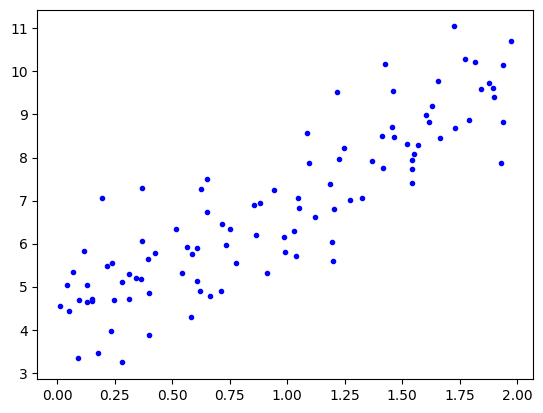

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# 画出原始的散点图
plt.plot(X, y, 'b.')

In [40]:
# normal equation
X_b = np.c_[np.ones(m), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

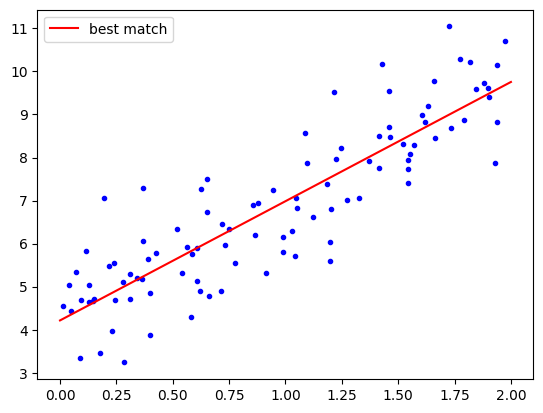

In [43]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(2), X_new]
y_prediction = X_new_b @ theta_best

plt.plot(X, y, 'b.')
plt.plot(X_new, y_prediction, 'r-', label='best match')
plt.legend()

In [44]:
# gradient descent
np.random.seed(42)
theta = np.random.randn(2, 1)
alpha = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - alpha * gradients

theta

array([[4.21509616],
       [2.77011339]])

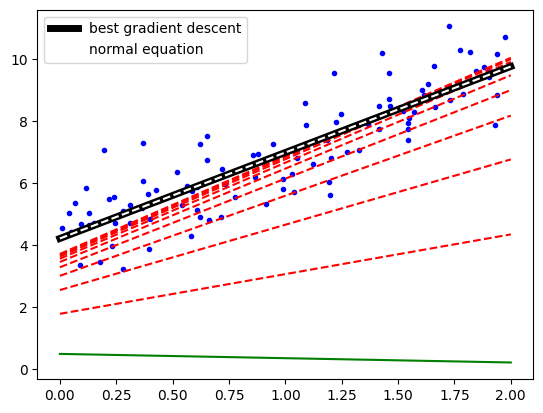

In [64]:
# 1. 先画出原始的散点图
plt.plot(X, y, 'b.')

# 2. 画出前十次模拟的直线
np.random.seed(42)
theta = np.random.randn(2, 1)
alpha = 0.1
n_epochs = 1000

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(2), X_new]

for epoch in range(n_epochs):
    if epoch < 10:
        style = 'r--' if epoch > 0 else 'g-'
        y_prediction = X_new_b @ theta
        plt.plot(X_new, y_prediction, style)
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - alpha * gradients

# 3. 画出最终模拟的直线
y_prediction = X_new_b @ theta
plt.plot(X_new, y_prediction, 'k-', linewidth=5, label='best gradient descent')
plt.plot(X_new, X_new_b @ theta_best, 'w--', label='normal equation')
plt.legend()